## 06-Data-Visualization-with-PyViz - Day 2 - Plotly Express, Mapbox API

### Class Objectives

* Compose visualizations using Plotly Express and the Mapbox API.
* Construct map plot visualizations.
* Interact with the geospatial visualizations created with Plotly Express and the Mapbox API.
* Create visualizations that consits of multiple plots.
* Style plots with titles, labels, yformatter, hover colors etc.

### Resources:
* [Plotly Express](https://plotly.com/python/plotly-express/)
* [Mapbox API](https://docs.mapbox.com/api/overview/)


### Install:
`Only if you have any installation issues`
* `conda deactivate`
* `conda install ipykernel`
* `conda create -n pyvizenv python=3.7 anaconda -y`
* `conda activate pyvizenv`
* `conda install -c plotly plotly=4.13. -y`
* `conda install -c pyviz hvplot -y`
* `conda install nodejs -y`
* `conda install streamz -y`
* `pip install python-dotenv`
* `jupyter labextension install jupyterlab-plotly@4.13.0`
* `jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.13.0`
* `jupyter labextension install @pyviz/jupyterlab_pyviz`
* `jupyter lab build`
* `conda list plotly`
* `conda list hvplot`

### API Keys:
* Sign-up for free [Mapbox](https://account.mapbox.com/auth/signup/) account

  - Copy your API Keys from [`Mapbox` Account](https://account.mapbox.com/) and add it to your .env file using:

```
    Mapbox
    MAPBOX_API_ACCESS_TOKEN = "Your_Mapbox_API_access_token_here"
```

# ================================

### 2.01 Instructor Do: Mapbox API Demo (10 min)

## Import the required libraries and dependencies

In [102]:
import plotly.express as px
import pandas as pd
import os
from pathlib import Path
from dotenv import load_dotenv

### Prep the Mapbox API Access Token

In [104]:
# Read the Mapbox API access token from the .env file
load_dotenv()
mapbox_api_access_token = os.getenv("MAPBOX_API_ACCESS_TOKEN")

# Confirm that the mapbox_api_access_token is available
if not mapbox_api_access_token:
    print("Error with the Mapbox API access token. Check the .env file.")

In [3]:
# Set the Mapbox API access token
px.set_mapbox_access_token(mapbox_api_access_token)

### Prepare the DataFrame

In [105]:
# Read in the population_counts.csv file into a DataFrame
population_df = pd.read_csv(
    Path("01-Ins_Mapbox_Demo/Resources/population_counts.csv")
).drop_duplicates()

# Review the DataFrame
display(population_df.head())
display(population_df.tail())


Year StateAbbr StateDesc    CityName  PopulationCount   Latitude  Longitude
0  2016        AL   Alabama  Birmingham           212237  33.527566 -86.798817
2  2016        AL   Alabama  Birmingham             3042  33.579433 -86.722832
3  2016        AL   Alabama  Birmingham             2735  33.542821 -86.752434
4  2016        AL   Alabama  Birmingham             3338  33.563245 -86.764047
5  2016        AL   Alabama  Birmingham             2864  33.544240 -86.774913

Year StateAbbr StateDesc  CityName  PopulationCount   Latitude  \
809610  2015        WY   Wyoming  Cheyenne             3961  41.158506   
809611  2015        WY   Wyoming  Cheyenne             1913  41.171776   
809612  2015        WY   Wyoming  Cheyenne             3312  41.160374   
809613  2015        WY   Wyoming  Cheyenne             4518  41.150634   
809614  2015        WY   Wyoming  Cheyenne              214  41.133617   

         Longitude  
809610 -104.777632  
809611 -104.788212  
809612 -104.756561  
809613 -104.755676  
809614 -104.719054

In [127]:
# Filter the DataFrame to include only New York state data
ny_data = population_df[population_df["StateDesc"] == "New York"]

# Review the DataFrame
display(ny_data.head())
display(ny_data.tail())


Year StateAbbr StateDesc CityName  PopulationCount   Latitude  \
483854  2016        NY  New York   Albany             2393  42.660364   
483858  2016        NY  New York   Albany            97856  42.666397   
483860  2016        NY  New York   Albany             2139  42.668922   
483861  2016        NY  New York   Albany             6046  42.664413   
483862  2016        NY  New York   Albany             5888  42.680903   

        Longitude  
483854 -73.765214  
483858 -73.798683  
483860 -73.736313  
483861 -73.751504  
483862 -73.782682

Year StateAbbr StateDesc CityName  PopulationCount   Latitude  \
552713  2015        NY  New York  Yonkers             1687  40.932726   
552714  2015        NY  New York  Yonkers             3356  40.926716   
552715  2015        NY  New York  Yonkers             5397  40.919680   
552716  2015        NY  New York  Yonkers             2689  40.923546   
552717  2015        NY  New York  Yonkers             2947  40.927029   

        Longitude  
552713 -73.854729  
552714 -73.844803  
552715 -73.850542  
552716 -73.855661  
552717 -73.861232

In [107]:
# Create a DataFrame consisting of the CityName, PopulationCount, Latitude and Longitude columns
ny_plot_df = ny_data[["CityName", "PopulationCount", "Latitude", "Longitude"]]

# Review the DataFrame
ny_plot_df.head()

CityName  PopulationCount   Latitude  Longitude
483854   Albany             2393  42.660364 -73.765214
483858   Albany            97856  42.666397 -73.798683
483860   Albany             2139  42.668922 -73.736313
483861   Albany             6046  42.664413 -73.751504
483862   Albany             5888  42.680903 -73.782682

In [141]:
ny_plot_ltlg = ny_plot_df[["CityName", "Latitude","Longitude"]]
ny_plot_ltlg2 = ny_plot_ltlg.groupby('CityName').max()
ny_plot_ltlg2.reset_index(inplace=True)
ny_plot_ltlg2

CityName   Latitude  Longitude
0        Albany  42.706314 -73.736313
1       Buffalo  42.961151 -78.801827
2  Mount Vernon  40.930501 -73.812842
3  New Rochelle  40.974264 -73.763569
4      New York  40.914021 -73.704609
5     Rochester  43.253913 -77.543045
6   Schenectady  42.829551 -73.904569
7      Syracuse  43.081205 -76.095636
8       Yonkers  40.981577 -73.821212

In [142]:
# Aggregate Population Count by CityName
ny_plot_df2 = ny_plot_df.groupby('CityName').sum()
ny_plot_df2.reset_index(inplace=True)
ny_plot_df3 = ny_plot_df2[["CityName", "PopulationCount"]]
ny_plot_df3 =  pd.merge(ny_plot_df3, ny_plot_ltlg2, on="CityName")
ny_plot_df3

CityName  PopulationCount   Latitude  Longitude
0        Albany           391424  42.706314 -73.736313
1       Buffalo          1045240  42.961151 -78.801827
2  Mount Vernon           269168  40.930501 -73.812842
3  New Rochelle           308248  40.974264 -73.763569
4      New York         32700532  40.914021 -73.704609
5     Rochester           842260  43.253913 -77.543045
6   Schenectady           264540  42.829551 -73.904569
7      Syracuse           580680  43.081205 -76.095636
8       Yonkers           783904  40.981577 -73.821212

### Plot data

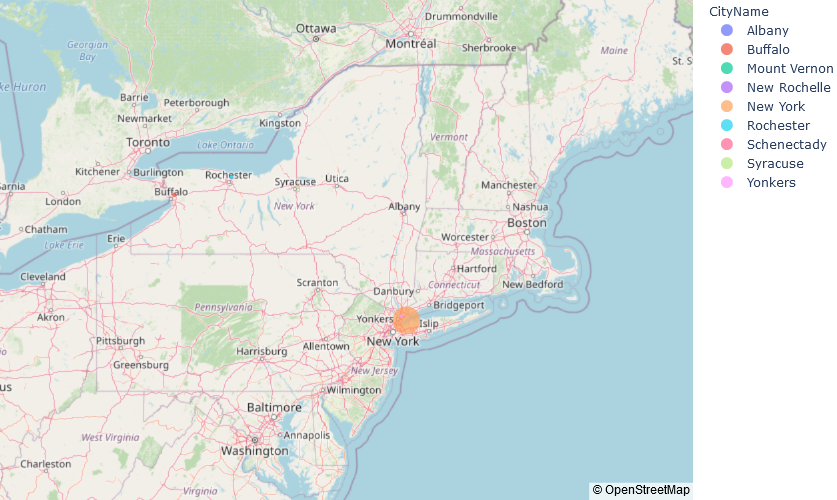

In [151]:
# Plot the data using the Mapbox API
map_plot = px.scatter_mapbox(
#     ny_plot_df,
    ny_plot_df3,
    lat="Latitude",
    lon="Longitude",
    size="PopulationCount",
    color="CityName",
    height=500, 
    zoom=5
)
map_plot.update_layout(mapbox_style="open-street-map")
map_plot.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
# Display the map
map_plot.show()

# ================================

### 2.02 Students Do: Mapping Adventures (10 min)

It's time to take a break from your day job and to plan an adventure!

Your friends have decided to plan a trip to New York City, and you're all looking forward to the time away from the office. In order to plan for the event, you started doing some research regarding points of interest. You've found one dataset that lists a bunch of cool places to see.

Use **Plotly Express** and the **Mapbox API** to create a geographical plots that will visualize each area of interest within the city.

### Instructions

1. Create a .env file to hold your **Mapbox API access token**. Use the function provided to confirm that the token is available for use in the pro

2. Read in the Mapbox API access token using the `os.getenv` function, and use the function provided to confirm that the token is available for use in the program. Finally, set your Mapbox API access token as the parameter in the `px.set_mapbox_access_token` function.

3. Read in the `nyc_places_interest.csv` file from the Resources folder into a Pandas DataFrame. Drop any rows that contain missing data or NaN values.

4. Use the Plotly Express `scatter_mapbox` function to plot all of the places of interest, setting the color to **Name**.

5. Use `scatter_mapbox` to plot places of interest by **PlaceType**.

6. Plot places of interest by **Borough**.

7. Plot **parks** that are of interest.

8. Plot **gardens** that are of interest.

9. Plot **squares** that are of interest.

10. **Challenge** Select just two locations from the `places_of_interest` DataFrame and plot them on a scatter plot map.

  > Hint: Use the Pandas [`isin` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html) to reference a list containing the names of the two locations, as specified in the "Name" column, that you would like to visit.


### Hint

Creating too many map plots in one notebook might create a memory issue. Consider creating a separate notebook for the challenge section. This will require you to read the CSV data in both notebooks.

It's time to take a break from your day job and plan an adventure!

Use **Plotly Express** and the **Mapbox API** to create a series of geographical plots that will visualize each area of interest within the city.

## Import the required libraries and dependencies

In [152]:
import pandas as pd
import plotly.express as px
import os
from pathlib import Path
from dotenv import load_dotenv

1. Create a .env file to hold your Mapbox API Access Token

2. Read in the Mapbox API access token using the `os.getenv` function. Use the function provided to confirm that the token is available for use in the program. Finally, set your Mapbox API access token as the parameter in the `px.set_mapbox_access_token` function.

In [153]:
# Set up API credentials
# Read the Mapbox API access token
load_dotenv()
mapbox_api_access_token = os.getenv("MAPBOX_API_ACCESS_TOKEN")

# Confirm that the mapbox_api_access_token is available
if not mapbox_api_access_token:
    print("Error with the Mapbox API access token. Check the .env file.")
    

In [154]:
# Set the Mapbox API access token
px.set_mapbox_access_token(mapbox_api_access_token)

3. Read in the `nyc_places_interest.csv` file from the Resources folder into a Pandas DataFrame. Drop any rows that contain missing data or NaN values.

In [155]:
# Read the the ny_places_interest.csv file into a DataFrame
places_of_interest = pd.read_csv(
    Path("02-Stu_Mapping_Adventures/Resources/nyc_places_interest.csv")
).dropna()

# Review the DataFrame
places_of_interest.head()

Id  Longitude   Latitude                Name PlaceType Borough
0  90 -73.888958  40.896210  Van Cortlandt Park      Park   Bronx
1  95 -73.871651  40.889879   Woodlawn Cemetery  Cemetery   Bronx
2  81 -73.838642  40.886965    Seton Falls Park      Park   Bronx
3  69 -73.809802  40.877986     Pelham Bay Park      Park   Bronx
4   8 -73.878308  40.864424    Botanical Garden    Garden   Bronx

## Plot the NYC Places of Interest

4. Plot All Places of Interest by Name

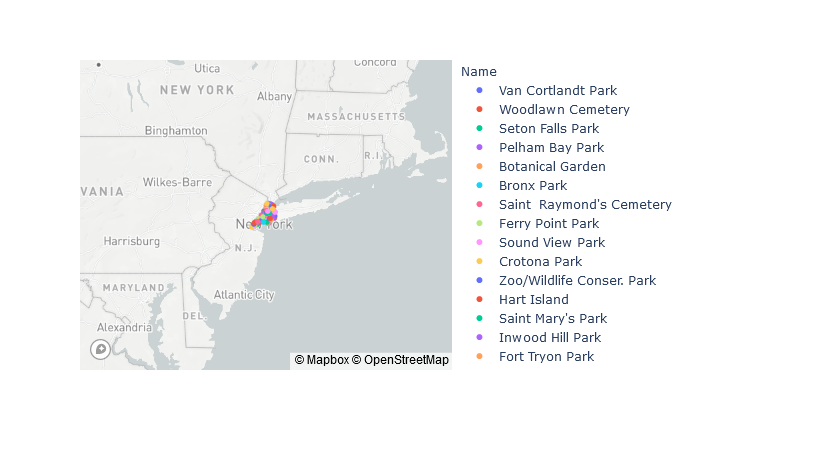

In [156]:
# Plot all of the NYC places of interest
# Set the color parameter to Name
places_of_interest_by_name = px.scatter_mapbox(
    places_of_interest,
    lat="Latitude",
    lon="Longitude",
    color="Name", 
    zoom=5
)

# Show the plot
places_of_interest_by_name.show()

5. Plot All Places of Interest by Place Type

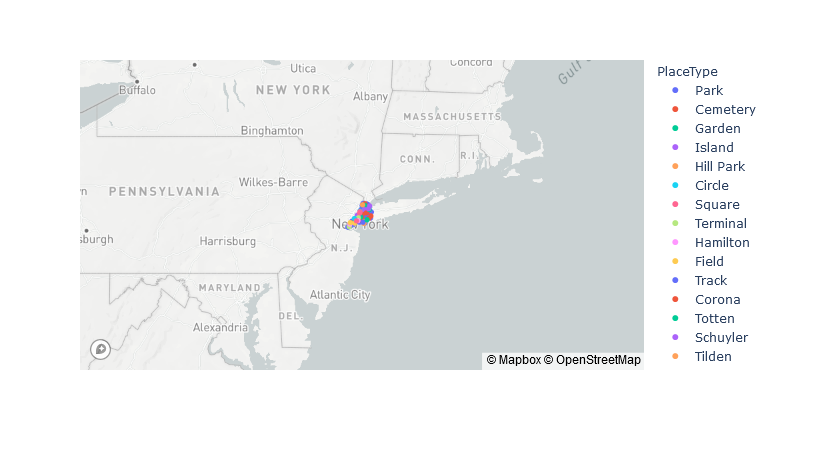

In [157]:
# Plot all of the NYC places of interest
# Set the color parameter to PlaceType
places_of_interest_by_place_type = px.scatter_mapbox(
    places_of_interest,
    lat="Latitude",
    lon="Longitude",
    color="PlaceType", 
    zoom=5
)

# Show the plot
places_of_interest_by_place_type.show()

6. Plot All Places of Interest by Borough

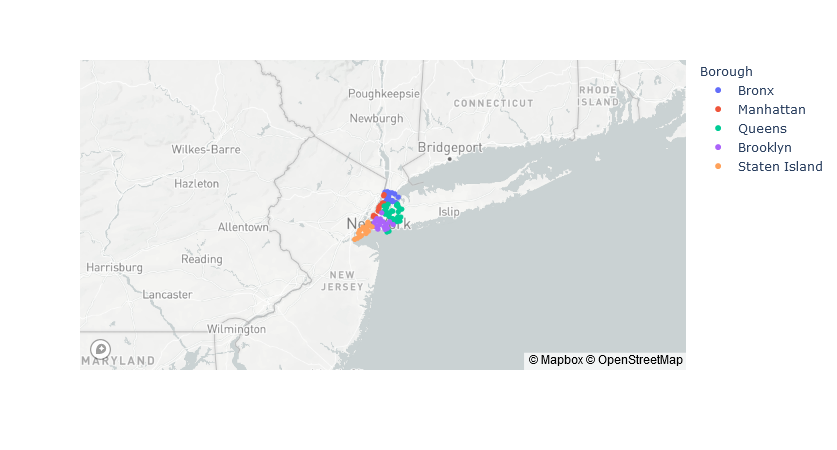

In [159]:
# Plot all of the NYC places of interest
# Set the color parameter to Borough
places_of_interest_by_borough = px.scatter_mapbox(
    places_of_interest,
    lat="Latitude",
    lon="Longitude",
    color="Borough", 
    zoom=6
)

# Show the plot
places_of_interest_by_borough.show()

7. Plot Parks of Interest

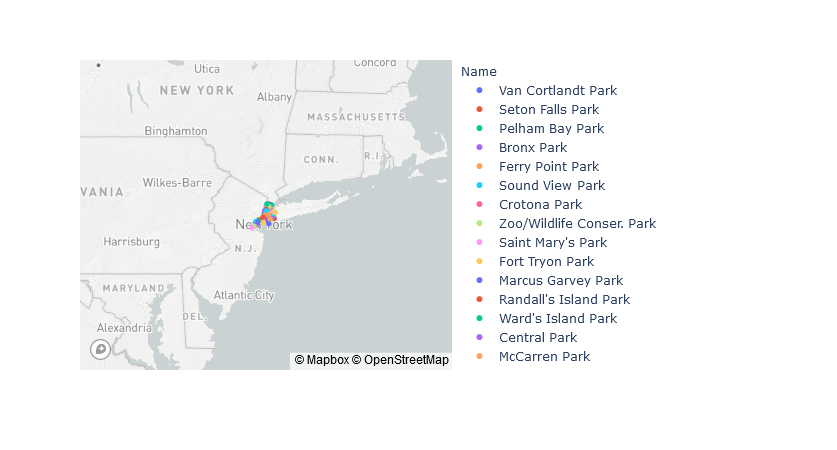

In [160]:
# Create a DataFrame that slices the places_of_intereset DataFrame to include only parks
parks = places_of_interest[places_of_interest["PlaceType"] == "Park"]

# Plot all of the parks in NYC
# What column should color be set equal to?
parks_of_interest = px.scatter_mapbox(
    parks,
    lat="Latitude",
    lon="Longitude",
    color="Name", 
    zoom=5
)

# Show the plot
parks_of_interest.show()

8. Plot Gardens of Interest

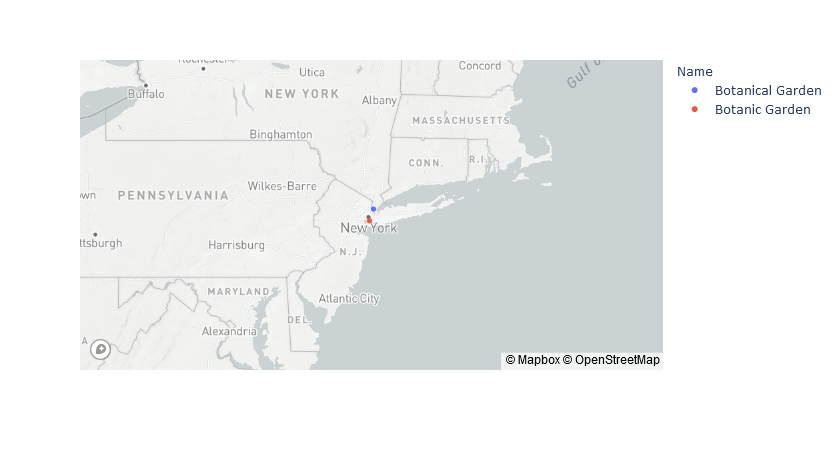

In [17]:
# Create a DataFrame that slices the places_of_intereset DataFrame to include only gardens
gardens = places_of_interest[places_of_interest["PlaceType"] == "Garden"]

# Plot all of the gardens in NYC
gardens_of_interest = px.scatter_mapbox(
    gardens, 
    lat="Latitude", 
    lon="Longitude", 
    color="Name", 
    zoom=5
)

# Show the plot
gardens_of_interest.show()

9. Plot Squares of Interest

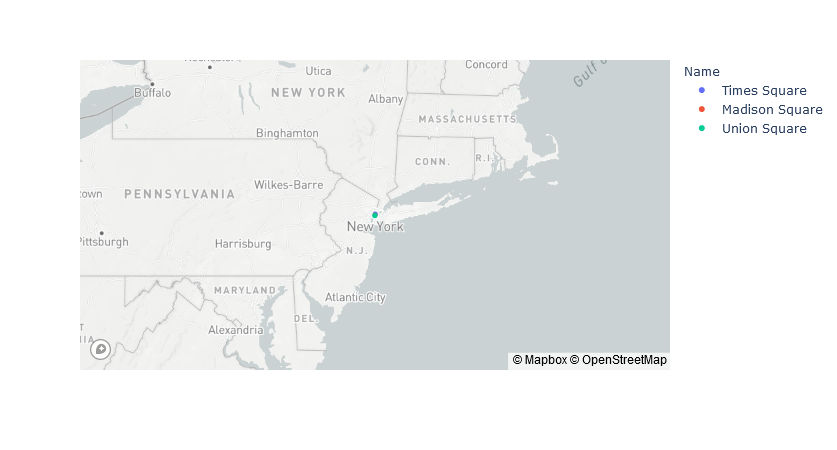

In [18]:
# Create a DataFrame that slices the places_of_intereset DataFrame to include only squares
squares = places_of_interest[places_of_interest["PlaceType"] == "Square"]

# Plot all of the gardens in NYC
squares_of_interst = px.scatter_mapbox(
    squares, 
    lat="Latitude", 
    lon="Longitude", 
    color="Name", 
    zoom=5
)

# Show the plot
squares_of_interst.show()

10. Chllenge - Pick two place of interest and plot them both on a the map

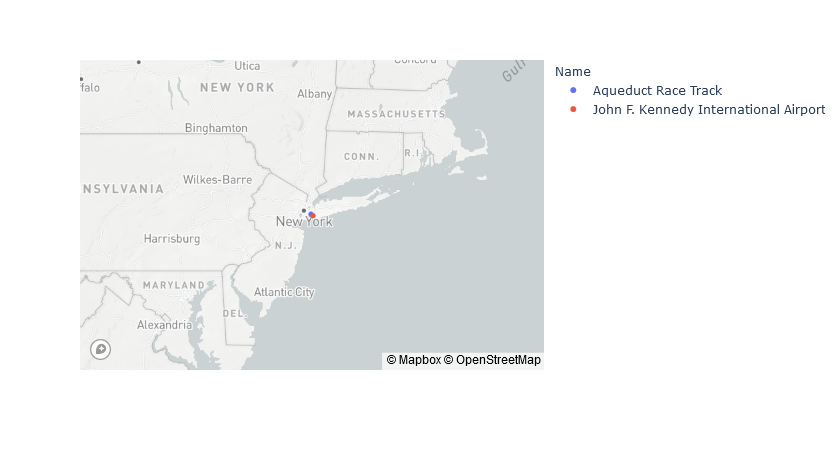

In [161]:
# Slice the name of two places from the places_of_interest DataFrame
# Use the Pandas isin function to reference the specific name of a location
two_places = places_of_interest[(
    places_of_interest["Name"].str.contains("Airport"))
    | (places_of_interest["Name"].isin(["Aqueduct Race Track"])
)]

# Create the Plot for just the two places
two_places_route = px.scatter_mapbox(
    two_places, 
    lat="Latitude", 
    lon="Longitude", 
    color="Name", 
    zoom=5
)

# Show the plot
two_places_route.show()

# ================================

### 2.03 Students Do: A Cartographer's Expedition (15 min)

You and your friends have decided to tackle NYC old school! No cell phones or GPS devices allowed. Although everyone is a bit nervous,  you realize that using an actual map might be pretty cool.

Instead of spending money on a map of NYC, become a true, modern cartographer and create interactive map plots that can be used by you and your friends to get the lay of the city.

Using the CSV file provided, your goal is to generate a map that plots between five and six locations in the city.  Plotly Express and Mapbox should be used to plot the route (point A to point B to point C) for the expedition.

## Instructions

1. Create a .env file to hold your **Mapbox API access token**.

2. Read in the Mapbox API access token using the `os.getenv` function. Use the function provided to confirm that the token is available for use in the program. Finally, set your Mapbox API access token as the parameter in the `px.set_mapbox_access_token` function.

3. Read in the `nyc_excursion_plans.csv` file in to a Pandas DataFrame. Drop any rows that contain missing data or NaN values.

4. Slice data for your **arriving airport** and the **first** location the group will visit.

  > Hint: You can use either or both of the Pandas [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html) or [`isin`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html) functions to access the names of the locations you intend to visit.

5. Now create a plot that includes your second and third location. Be sure to include your first stop so that you know how to get to the second.

6. Now create a plot that includes your fourth and fifth location. Be sure to include your third stop so that you know how to get where you are going.

7. Plot all locations on one map. What is the order in which you should visit them to get you back to the airport most efficiently?

### Challenge

If there are places in NYC that you'd like to visit and you know their geospatial details (latitude and longitude), feel free to add them to the data file. Be careful not to corrupt the data file.

If you do corrupt the file, re-download the data and start again.

You and your friends have decided to tackle NYC old school! No cell phones or GPS devices allowed. Although everyone is a bit nervous,  you realize that using an actual map might be pretty cool.

Your goal is to generate a map that plots your between five and six locations in the city.  Plotly Express and Mapbox should be used to plot the route (point A to point B to point C) for the expedition.

## Import the required libraries and dependencies

In [162]:
import pandas as pd
import plotly.express as px
import os
from pathlib import Path
from dotenv import load_dotenv

1. Create a .env file to hold your Mapbox API Access Token

2. Read in the Mapbox API access token using the `os.getenv` function. Use the function provided to confirm that the token is available for use in the program. Finally, set your Mapbox API access token as the parameter in the `px.set_mapbox_access_token` function.

In [163]:
# Set up API credentials
# Read the Mapbox API access token
load_dotenv()
mapbox_api_access_token = os.getenv("MAPBOX_API_ACCESS_TOKEN")

# Confirm that the mapbox_api_access_token is available
if not mapbox_api_access_token:
    print("Error with the Mapbox API access token. Check the .env file.")
    

In [164]:
# Set the Mapbox API access token
px.set_mapbox_access_token(mapbox_api_access_token)

3. Read in the `nyc_excursion_plans.csv` file into a Pandas DataFrame. Drop any rows that contain missing data or NaN values.

In [170]:
# Read the the ny_places_interest.csv file into a DataFrame
places_of_interest = pd.read_csv(
    Path('03-Stu_Cartographers_Expedition/Resources/nyc_excursion_plans.csv')
).dropna()

# Review the DataFrame
places_of_interest.head()

Id  Longitude   Latitude                Name PlaceType Borough
0  90 -73.888958  40.896210  Van Cortlandt Park      Park   Bronx
1  95 -73.871651  40.889879   Woodlawn Cemetery  Cemetery   Bronx
2  81 -73.838642  40.886965    Seton Falls Park      Park   Bronx
3  69 -73.809802  40.877986     Pelham Bay Park      Park   Bronx
4   8 -73.878308  40.864424    Botanical Garden    Garden   Bronx

4. Slice the DataFrame to include the arrival airport and first location

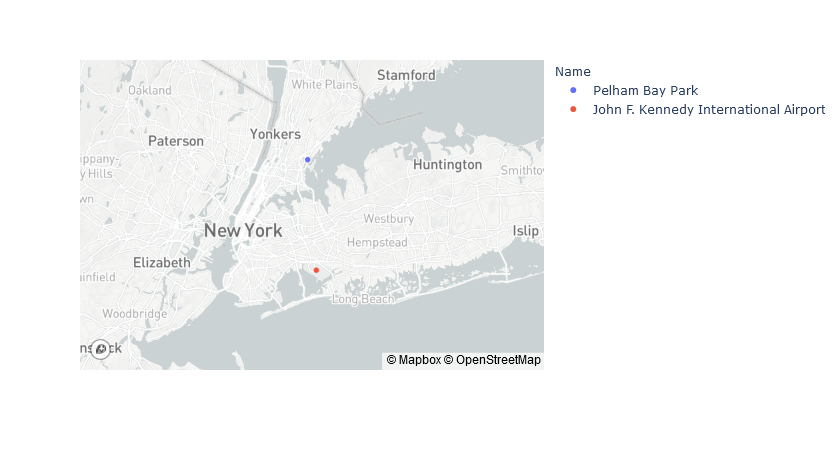

In [175]:
# Create a DataFrame with the arriving Airport and the first location you will visit
arrival_and_first_location = places_of_interest[
    (places_of_interest["Name"].str.contains("Airport"))
    | (places_of_interest["Name"].isin(["Pelham Bay Park"]))
]

# Plot the arriving airport and the first location
first_route = px.scatter_mapbox(
    arrival_and_first_location, 
    lat="Latitude", 
    lon="Longitude", 
    color="Name"
)


# Show the plot
first_route.show()

5. Plot the route between your first, second and third locations.

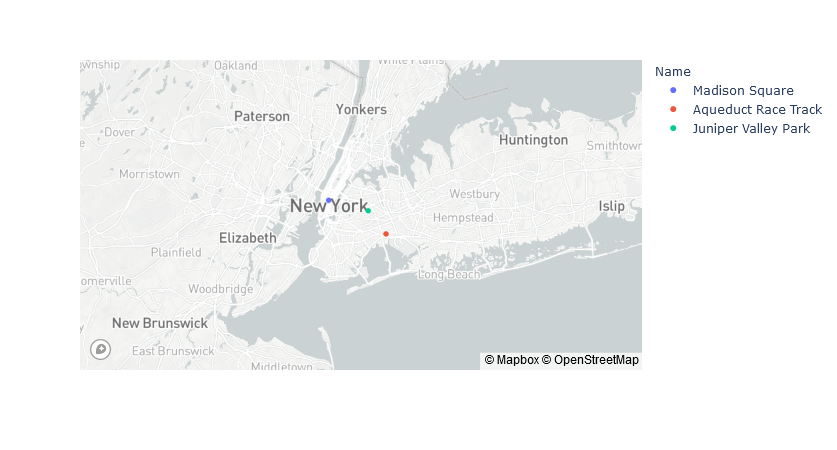

In [176]:
# Plot the route between the first second and third locations
first_second_third_locations = places_of_interest[
    places_of_interest["Name"].isin(
        ["Aqueduct Race Track", "Juniper Valley Park", "Madison Square"]
    )
]

# Create the plot including your first, second and third locations
second_route = px.scatter_mapbox(
    first_second_third_locations, 
    lat="Latitude", 
    lon="Longitude", 
    color="Name"
)

# Show the Plot
second_route.show()

6. Plot the route between your third, fourth, and fifth locations.

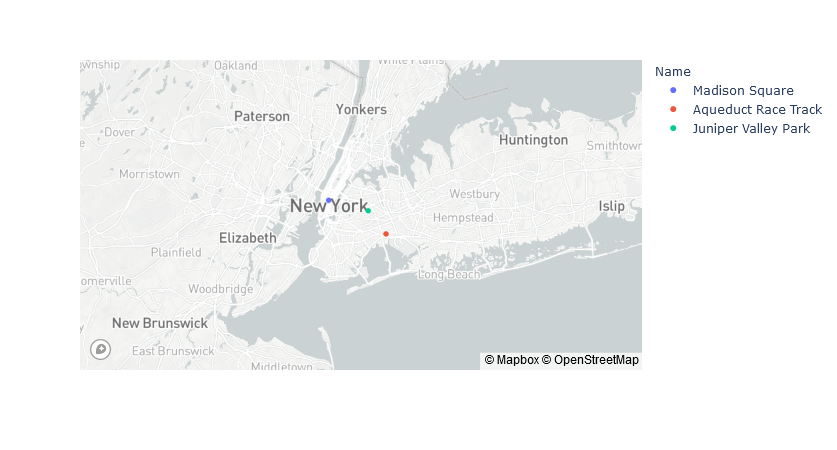

In [168]:
## Plot the route between your third, fourth, and fifth locations.
third_fourth_fifth_locations = places_of_interest[
    places_of_interest["Name"].isin(
        ["Madison Square", "Liberty Island", "Ellis Island"]
    )
]

# Create the plot including your third, fourth and fifth locations
third_route = px.scatter_mapbox(
    first_second_third_locations, 
    lat="Latitude", 
    lon="Longitude", 
    color="Name"
)

# Show the Plot
third_route.show()

7. Plot all the stops in your excursion

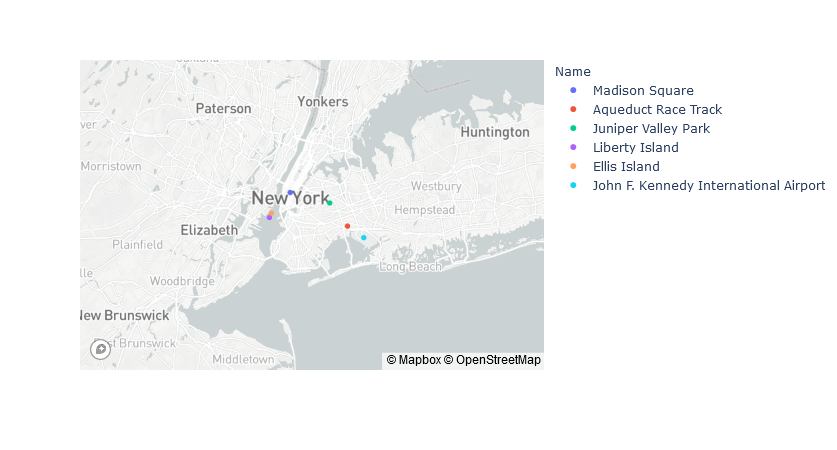

In [169]:
# Plot course for all of the stops in your excursion, including the airport
all_stops = places_of_interest[
    (places_of_interest["Name"].str.contains("Airport"))
    | (
        places_of_interest["Name"].isin(
            [
              "Aqueduct Race Track", 
              "Juniper Valley Park", 
              "Madison Square", 
              "Liberty Island", 
              "Ellis Island"
            ]
        )
    )
]

# Create the plot that shows all of you stops
plot_all_stops = px.scatter_mapbox(
    all_stops, 
    lat="Latitude", 
    lon="Longitude", 
    color="Name"
)

# Show the Plot
plot_all_stops.show()

**Question** Given the location of the stops on your excursion, what is the order in which you should visit them to get you back to the airport most efficiently?

**Answer** Given the stops listed, the most efficient visiting order is: Juniper Valley Park, Madison Square Garden, Ellis Island, Liberty Island, and finally Aqueduct Race Track, which is closest to the airport to ensure traffic does not prevent us from making the flight home!

# ================================

### 2.04 Instructor Do: Composing Plots (10 min)

In [28]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path

## Prepare the Hospital Claims DataFrame

In [177]:
# Read in hospital_claims.csv file as a Pandas DataFrame
hospital_data = pd.read_csv(Path("04-Ins_Composing_Plots/Resources/hospital_claims.csv"))

# Review the DataFrame
hospital_data.head()

DRG Definition  Provider Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   

                      Provider Name     Provider Street Address Provider City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider State  Provider Zip Code Hospital Referral Region Description  \
0             AL              36301                          AL - Dothan   
1             AL              35957                      AL - Birmingham   
2             AL              35631                      AL - Birmingham   
3             AL              35235                      AL - Birmingham   
4             AL              35007                      AL - Birmingham   

   Total Discharges  Average Covered Charges  Average Total Payments  \
0                91                 32963.07                 5777.24   
1                14                 15131.85                 5787.57   
2                24                 37560.37                 5434.95   
3                25                 13998.28                 5417.56   
4                18                 31633.27                 5658.33   

   Average Medicare Payments  
0                    4763.73  
1                    4976.71  
2                    4453.79  
3                    4129.16  
4                    4851.44

In [181]:
# Slice the DataFrame to consist of only "552 - MEDICAL BACK PROBLEMS W/O MCC" information
procedure_552_charges = hospital_data[
    hospital_data["DRG Definition"].isin(["552 - MEDICAL BACK PROBLEMS W/O MCC"]) 
]

# Review the DataFrame
procedure_552_charges.head()

DRG Definition  Provider Id  \
118109  552 - MEDICAL BACK PROBLEMS W/O MCC        50128   
118137  552 - MEDICAL BACK PROBLEMS W/O MCC        50764   
118355  552 - MEDICAL BACK PROBLEMS W/O MCC        60001   
118383  552 - MEDICAL BACK PROBLEMS W/O MCC       100009   
120657  552 - MEDICAL BACK PROBLEMS W/O MCC       100012   

                         Provider Name Provider Street Address Provider City  \
118109         TRI-CITY MEDICAL CENTER          4002 VISTA WAY     OCEANSIDE   
118137  SHASTA REGIONAL MEDICAL CENTER           1100 BUTTE ST       REDDING   
118355   NORTH COLORADO MEDICAL CENTER        1801 16TH STREET       GREELEY   
118383    UNIVERSITY OF MIAMI HOSPITAL        1400 NW 12TH AVE         MIAMI   
120657           LEE MEMORIAL HOSPITAL      2776 CLEVELAND AVE    FORT MYERS   

       Provider State  Provider Zip Code Hospital Referral Region Description  \
118109             CA              92056                       CA - San Diego   
118137             CA              96001                         CA - Redding   
118355             CO              80631                         CO - Greeley   
118383             FL              33136                           FL - Miami   
120657             FL              33901                      FL - Fort Myers   

        Total Discharges  Average Covered Charges  Average Total Payments  \
118109                14                 26610.85                 5970.57   
118137                29                 36127.31                 6305.17   
118355                48                 20543.02                 5454.12   
118383                37                 40265.86                 6362.72   
120657                83                 20712.84                 4889.45   

        Average Medicare Payments  
118109                    5007.14  
118137                    5219.93  
118355                    4252.91  
118383                    5466.67  
120657                    3755.37

## Slice data for Average Total Payments by State

In [182]:
# Group data by state and average total payments, and then sum the values
payments_by_state = procedure_552_charges[["Average Total Payments", "Provider State"]]
payments_by_state

Average Total Payments Provider State
118109                 5970.57             CA
118137                 6305.17             CA
118355                 5454.12             CO
118383                 6362.72             FL
120657                 4889.45             FL
...                        ...            ...
122833                 4466.33             WY
122834                 5812.37             TX
122835                 4521.36             TX
122836                 4406.89             TX
122837                 5477.15             TX

[1801 rows x 2 columns]

In [183]:
# Sum the average total payments by state
total_payments_by_state = payments_by_state.groupby("Provider State").sum()

# Review the DataFrame
total_payments_by_state.head()

Average Total Payments
Provider State                        
AK                             7134.40
AL                           149613.29
AR                           116147.95
AZ                           151868.43
CA                          1068146.26

### Create the plot objects

In [184]:
# Plot data using hvplot.bar
total_payments_by_state.hvplot.bar()

:Bars   [Provider State]   (Average Total Payments)

In [185]:
# Sort the state data values by Average Total Paymnts
sorted_total_payments_by_state = total_payments_by_state.sort_values("Average Total Payments")

# Plot the sorted data
sorted_total_payments_by_state.hvplot()

:Curve   [Provider State]   (Average Total Payments)

## Compose side-by-side plots using the + operator

In [186]:
# Compose plots using + operator. 
total_payments_by_state.hvplot.bar() + sorted_total_payments_by_state.hvplot()

:Layout
   .Bars.I  :Bars   [Provider State]   (Average Total Payments)
   .Curve.I :Curve   [Provider State]   (Average Total Payments)

In [188]:
# We prevent this by renaming the index in one of the dataframes before plotting them.
sorted_total_payments_by_state.index.names = ['Provider State Sorted']
sorted_total_payments_by_state

Average Total Payments
Provider State Sorted                        
AK                                    7134.40
VT                                   19177.08
ND                                   21587.56
DE                                   22953.18
WY                                   25197.86
ID                                   31612.40
MT                                   32031.52
RI                                   33891.27
SD                                   38783.74
HI                                   38968.58
DC                                   44838.67
UT                                   46149.52
NM                                   54630.40
NH                                   57364.19
ME                                   74138.03
OR                                   75837.60
NV                                   83083.28
KS                                   83257.31
NE                                   83783.36
WV                                   90093.91
MS                                  104387.94
IA                                  110604.10
OK                                  111519.67
LA                                  116015.94
AR                                  116147.95
CT                                  136766.25
CO                                  138644.56
SC                                  147576.72
AL                                  149613.29
AZ                                  151868.43
KY                                  158763.17
TN                                  161475.18
MN                                  163921.29
WI                                  188787.86
WA                                  189063.75
GA                                  222556.41
VA                                  233669.05
MO                                  234918.52
IN                                  235500.23
NC                                  271811.07
MD                                  287242.16
MA                                  300517.72
MI                                  335176.84
NJ                                  388857.78
OH                                  454033.99
PA                                  509391.15
IL                                  572914.60
TX                                  605662.00
FL                                  714289.59
NY                                  767789.88
CA                                 1068146.26

In [189]:
total_payments_by_state.hvplot.bar() + sorted_total_payments_by_state.hvplot()

:Layout
   .Bars.I  :Bars   [Provider State]   (Average Total Payments)
   .Curve.I :Curve   [Provider State Sorted]   (Average Total Payments)

## Slice data for Average Medicare Payments by State

In [190]:
# Group data by state and average medicare payments, and then sum the values
medicare_payment_by_state = procedure_552_charges[["Average Medicare Payments", "Provider State"]]

total_medicare_by_state = medicare_payment_by_state.groupby("Provider State").sum()

total_medicare_by_state.head()

Average Medicare Payments
Provider State                           
AK                                6008.80
AL                              112154.39
AR                               90176.26
AZ                              120926.12
CA                              901778.32

In [193]:
# Sort data values
sorted_total_medicare_by_state = total_medicare_by_state.sort_values("Average Medicare Payments")

sorted_total_medicare_by_state.hvplot.bar(rot=90)

:Bars   [Provider State]   (Average Medicare Payments)

## Compose overlay plots using the + operator

In [192]:
# Overlay plots of different type using * operator
sorted_total_payments_by_state.hvplot.line(label="Average Total Payments") * sorted_total_medicare_by_state.hvplot.bar(label="Average Medicare Payments")

:Overlay
   .Curve.Average_Total_Payments   :Curve   [Provider State Sorted]   (Average Total Payments)
   .Bars.Average_Medicare_Payments :Bars   [Provider State]   (Average Medicare Payments)

In [197]:
# Overlay plots of the same type using * operator
sorted_total_payments_by_state.hvplot.bar(label="Average Total Payments", rot=90, width=1000) * sorted_total_medicare_by_state.hvplot.bar(label="Average Medicare Payments")

:Overlay
   .Bars.Average_Total_Payments    :Bars   [Provider State Sorted]   (Average Total Payments)
   .Bars.Average_Medicare_Payments :Bars   [Provider State]   (Average Medicare Payments)

# ================================

### 2.05 Students Do: Composing Masterpieces (10 min)

In your role as a data analyst for a video streaming service, you have been asked by your manager to compare and contrast the subscriber data for various international regions over the last several years.

The continued growth of you firm is dependant on the number of subcribers to the service. You manager has asked you to review the rates of growith in subscriber numbers across time to help determine when their marketing dollars are best focused.

Use your knowledge of compose and overlay plots to create visualizations to gather the data requested by your manager.

## Instructions

1. Open the [starter file](05-Stu_Composing_Masterpieces/Unsolved/composing_masterpieces.ipynb), and create a Pandas DataFrame from the "subscriber_numbers.csv" file that is located in the Resources folder.

2. Using both a compose plot and and overlay plot, compare the subscriber numbers for each region for the periods "Q1 - 2018", "Q1 - 2019", and "Q1-2020".  How does the rate of growth compare across each region over the time periods being analyzed?

3. Using both a compose plot and and overlay plot, combare the time series trends in subscriber numbers for the two largest regions detailed in the dataset, the "United States and Canada" region and the "Europe, Middle East and Africa" region. How does the rate of growth over the time series compare across the two regions?

4. Given the information in these visualizations, toward what region would you recommend that advertising dollars be focused?

### Hint

Composing plots of different kinds can help users visualize differences in data points. Consider composing plots of different kinds to help underscore similarities and differences in trends.

Also, remember to leverage labels so that you can clearly identify the information displayed by each plot. This will help users glean better insights from the visualization.

---

In your role as a data analyst for a video streaming service, you have been asked by your manager to compare and contrast the subscriber data for various international regions over the last several years. 

Use your knowledge of compose and overlay plots to create visualizations to gather the data requested by your manager. 

In [198]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path

1. Prepare the Subscriber Numbers DataFrame

In [199]:
pwd

'C:\\Users\\k\\OneDrive\\Berkeley\\UCB-VIRT-FIN-PT-12-2020-U-B-TTH\\02-Live-Lesson-Plans\\06-Data-Visualization-with-PyViz\\2\\Activities'

In [200]:
# Read in subscriber_numbers.csv file into a Pandas DataFrame
subscribers_df = pd.read_csv(Path("05-Stu_Composing_Masterpieces/Resources/subscriber_numbers.csv"))

# Review the DataFrame
subscribers_df.head()

Area      Years  Subscribers
0        United States and Canada  Q1 - 2018     60909000
1  Europe, Middle East and Africa  Q1 - 2018     29339000
2                   Latin America  Q1 - 2018     21260000
3                    Asia-Pacific  Q1 - 2018      7394000
4        United States and Canada  Q2 - 2018     61870000

2. Using both a compose plot and and overlay plot, compare the subscriber numbers for each region for the periods "Q1 - 2018", "Q1 - 2019", and "Q1-2020".

In [207]:
# Create a DataFrame that slices the subscriber data for Q1 - 2018.
q1_2018 = subscribers_df[subscribers_df['Years'] == 'Q1 - 2018']

# Set the index of the DataFrame to Area
q1_2018 = q1_2018.set_index('Area')

# Create a bar chart of the Q1 - 2018 data
q1_2018_plot = q1_2018['Subscribers'].hvplot.bar(label="Subscriber Numbers - Q1 2018", rot=45)

# Show the bar chart
q1_2018_plot

:Bars   [Area]   (Subscribers)

In [208]:
# Create a DataFrame that slices the subscriber data for Q1 - 2018.
q1_2019 = subscribers_df.loc[subscribers_df['Years'] == 'Q1 - 2019']

# Set the index of the DataFrame to Area
q1_2019 = q1_2019.set_index('Area')

# Create a bar chart of the Q1 - 2018 data
q1_2019_plot = q1_2019['Subscribers'].hvplot.bar(label="Subscriber Numbers - Q1 2019")

# Show the bar chart
q1_2019_plot

:Bars   [Area]   (Subscribers)

In [209]:
# Create a DataFrame that slices the subscriber data for Q1 - 2018.
q1_2020 = subscribers_df.loc[subscribers_df['Years'] == 'Q1 - 2020']

# Set the index of the DataFrame to Area
q1_2020 = q1_2020.set_index('Area')

# Create a bar chart of the Q1 - 2018 data
q1_2020_plot = q1_2020['Subscribers'].hvplot.bar(label="Subscriber Numbers - Q1 2020")

# Show the bar chart
q1_2020_plot

:Bars   [Area]   (Subscribers)

## Create a compose plot to visualize the Q1 data

In [210]:
# Create a compose plot to visualize the Q1 data side-by-side
q1_2018_plot + q1_2019_plot + q1_2020_plot

:Layout
   .Bars.Subscriber_Numbers_hyphen_minus_Q1_2018 :Bars   [Area]   (Subscribers)
   .Bars.Subscriber_Numbers_hyphen_minus_Q1_2019 :Bars   [Area]   (Subscribers)
   .Bars.Subscriber_Numbers_hyphen_minus_Q1_2020 :Bars   [Area]   (Subscribers)

## Create an overlay plot for the Q1 data

> Hint: Does the order of the plots change the visualization?

In [211]:
# Create an overlay plot to visualize the Q1 data
q1_2020_plot * q1_2019_plot * q1_2018_plot

:Overlay
   .Bars.Subscriber_Numbers_hyphen_minus_Q1_2020 :Bars   [Area]   (Subscribers)
   .Bars.Subscriber_Numbers_hyphen_minus_Q1_2019 :Bars   [Area]   (Subscribers)
   .Bars.Subscriber_Numbers_hyphen_minus_Q1_2018 :Bars   [Area]   (Subscribers)

**Question:** How does the rate of growth compare across each region over the time periods being analyzed?

**Answer:** The United States and Canada region has the most subscribers overall. However, for the Q1 periods for 2019 and 2020, it is the regions of Europe, Middle East and Africa that have demonstrated the largest rates of growth. 

3. Using both a compose plot and and overlay plot, combare the time series trends in subscriber numbers for the two largest regions detailed in the dataset, the "United States and Canada" region and the "Europe, Middle East and Africa" region.

In [212]:
# Create a DataFrame that slices the subscriber data for the United States and Canada
us_canada_subscribers = subscribers_df.loc[subscribers_df['Area'] == 'United States and Canada']

# Set the index of the DataFrame to Years
us_canada_subscribers = us_canada_subscribers.set_index('Years')

# Create a line plot of the US and Canada data
us_canada_plot = us_canada_subscribers['Subscribers'].hvplot(label = 'US and Canada Subscribers')

# Show the plot
us_canada_plot

:Curve   [Years]   (Subscribers)

In [271]:
# Create a DataFrame that slices the subscriber data for the Europe, Middle East and Africa area
emea_subscribers = subscribers_df[subscribers_df['Area'] == 'Europe, Middle East and Africa']

# Set the index of the DataFrame to Years
emea_subscribers = emea_subscribers.set_index('Years')

# Create a line plot of the US and Canada data
emea_plot = emea_subscribers['Subscribers'].hvplot.bar(label = 'Europe, Middle East and Africa Subscribers')

# Show the plot
emea_plot

:Bars   [Years]   (Subscribers)

## Create a compose plot to visualize the subscriber time series data for the two regions

In [214]:
# Create a compose plot to visualize the subscriber time series data for the two regions
us_canada_plot + emea_plot

:Layout
   .Curve.US_and_Canada_Subscribers                       :Curve   [Years]   (Subscribers)
   .Curve.Europe_comma_Middle_East_and_Africa_Subscribers :Curve   [Years]   (Subscribers)

## Create an overlay plot for the subcriber time series data

In [215]:
# Create an overlay plot to visualize the subscriber time series data for the two regions
us_canada_plot * emea_plot

:Overlay
   .Curve.US_and_Canada_Subscribers                       :Curve   [Years]   (Subscribers)
   .Curve.Europe_comma_Middle_East_and_Africa_Subscribers :Curve   [Years]   (Subscribers)

**Question:**How does the rate of growth over the time series compare across the two regions?

**Answer:** This plot confirms that the growth rate in subscribers is much higher in the Europe, Middle East and Africa region.  

4. Answer the following question:

**Question:** Given the information in these visualizations, toward what region would you recommend that advertising dollars be focused?

**Answer:** As a result of the growth rate being exhibited, I would suggest that advertising dollar be focused toward the Europe, Middle East and Africa region. Additionally, the Q1 - 2020 information is indicative of a growing trend in both Latin American and the Asia-Pacific region. I would suggest allocating some of the advertising budget to these small, but growing, regions.

The growth figures display for the US and Canada region seems to be indicative or a market that is reaching a point of saturation, although there was an uptick in Q2 - 2020. This region should be watched closely over the next few months. 

# ================================

### 2.06 Instructor Do: Visualization Options (10 min)

In [216]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path

##  Prepare the DataFrame

In [236]:
# Read in subscriber_numbers.csv file into a Pandas DataFrame
subscribers_df = pd.read_csv(Path("06-Ins_Viz_Options/Resources/subscriber_numbers.csv"))
subscribers_df["Subscribers_in_mil"] = subscribers_df["Subscribers"] /1000000
# del subscribers_df["Subscribers"]
# Review the DataFrame
subscribers_df.head()

Area      Years  Subscribers  Subscribers_in_mil
0        United States and Canada  Q1 - 2018     60909000              60.909
1  Europe, Middle East and Africa  Q1 - 2018     29339000              29.339
2                   Latin America  Q1 - 2018     21260000              21.260
3                    Asia-Pacific  Q1 - 2018      7394000               7.394
4        United States and Canada  Q2 - 2018     61870000              61.870

## Create an overlay plo that compares the subscriber numbers for each region for the periods "Q1 - 2018", "Q1 - 2019", and "Q1-2020".

In [237]:
# Create a DataFrame that slices the subscriber data for Q1 - 2018.
q1_2020 = subscribers_df.loc[subscribers_df['Years'] == 'Q1 - 2020']

# Set the index of the DataFrame to Area
q1_2020 = q1_2020.set_index('Area')

# Create a bar chart of the Q1 - 2018 data
q1_2020['Subscribers_in_mil'].hvplot.bar()

:Bars   [Area]   (Subscribers_in_mil)

In [238]:
# Update the Q1 - 2018 plot with rotation, x- and y-axis labels
q1_2020['Subscribers'].hvplot.bar( 
    xlabel="International Region",
    ylabel="Number of Subscribers",
    rot=30
)

:Bars   [Area]   (Subscribers)

In [239]:
# Update the Q1 - 2018 data with yformatter
q1_2020['Subscribers'].hvplot.bar( 
    xlabel="International Region",
    ylabel="Number of Subscribers",
    rot=30
).opts(yformatter='%.0f')

:Bars   [Area]   (Subscribers)

In [240]:
# Update the Q1 - 2018 data with a title
q1_2020['Subscribers'].hvplot.bar( 
    xlabel="International Region",
    ylabel="Number of Subscribers",
    rot=30
).opts(
    yformatter='%.0f',
    title="Subscriber Nubmers by Region - Q1 2020",
)

:Bars   [Area]   (Subscribers)

In [241]:
# Update the Q1 - 2018 data replacing the title with the label parameter
q1_2020['Subscribers'].hvplot.bar( 
    label="Subscriber Nubmers by Region - Q1 2020",
    xlabel="International Region",
    ylabel="Number of Subscribers",
    rot=30
).opts(
    yformatter='%.0f',
)

:Bars   [Area]   (Subscribers)

In [245]:
# Update the Q1 - 2018 data with color and hover_color
q1_2020['Subscribers_in_mil'].hvplot.bar(
    label="Subscriber Nubmers by Region - Q1 2020",
    xlabel="International Region",
    ylabel="Number of Subscribers in mil",
    rot=30
).opts(
    yformatter='%.0f',
    color="purple",
    hover_color="orange"
)

:Bars   [Area]   (Subscribers_in_mil)

# ================================

### 2.07 Students Do: Picture Perfect (10 min)

Still in your role as a data analyst for a video streaming service, you have now been asked by your manager to compare and contrast the revenue numbers by quarter for the various international regions.

The results of your analysis will be presented at the board meeting so you need to make sure your visualizations are picture perfect.  Using the customization attributes and options demonstrated by the instructor, curate your visualizations. Make sure to assess each plot for opportunities of aesthetic improvement.

Be sure to consult the [HvPlot Customization](https://hvplot.holoviz.org/user_guide/Customization.html) page for additional opportunities of aesthetic improvement.

## Instructions

1. Open the [starter file](07-Stu_Picture_Perfect/Unsolved/picture_perfect.ipynb), and create a Pandas DataFrame from the regional_revenue.csv file that is located in the Resources folder.

2. Create a line plot that visualizes the growth in revenue for the United States and Canada region.

3. Add x- and y-axis labels to your plot. Rotate the x-axis plot ticks 45 degrees.

4. Add a title to the US and Canada revenue plot.

5. Use the yformatter option to format y-axis values.

6. Add a line_color of blue and hover_line_color of yellow to the plot.

7. Save the plot you just created to a variable so that it can eventually be utilized in an overlay plot.

8. Create a line plot that visualizes the growth in revenue for the Europe, Middle East and Africa region. Style it with the same options utilized in the first plot. However, make the line_color equal to orange. Be sure to save this plot to a variable as well.

9. Create an overlay plot for the "United States and Canada" and the "Europe, Middle East and Africa" regions.

10. Add a title to the overlay plot. Additionally, adjust height, width and background color.

    > Hint: The `opts` function can be used customize composite plot (i.e `(plot_state_avgs * plot_2015_2016 * plot_2010_2014).opts(bgcolor="lightgrey")`)

11. If time permits, add stylized line plots for the Asia-Pacific and Latin America regions and include them in the overlay plot.
---

Still in your role as a data analyst for a video streaming service, you have now been asked by your manager to compare and contrast the revenue numbers by quarter for the various international regions.

Be sure to consult the [HvPlot Customization](https://hvplot.holoviz.org/user_guide/Customization.html) page for additional opportunities of aesthetic improvement.

In [246]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path

1. Prepare the Regional Revenue DataFrame

In [247]:
# Read in regional_revenue.csv file into a Pandas DataFrame
regional_revenue_df = pd.read_csv(Path("07-Stu_Picture_Perfect/Resources/regional_revenue.csv"))

# Review the DataFrame
regional_revenue_df.head()

Area      Years     Revenue
0        United States and Canada  Q1 - 2018  1976157000
1  Europe, Middle East and Africa  Q1 - 2018   886649000
2                   Latin America  Q1 - 2018   540182000
3                    Asia-Pacific  Q1 - 2018   199117000
4        United States and Canada  Q2 - 2018  2049546000

2. Create a plot that visualizes the growth in revenue for the United States and Canada

In [250]:
# Create a DataFrame that slices the subscriber data for the United States and Canada
us_canada_revenue = regional_revenue_df.loc[regional_revenue_df['Area'] == 'United States and Canada']

# Set the index of the DataFrame to Years
us_canada_revenue = us_canada_revenue.set_index('Years')

# Create a line plot of the US and Canada Revenue data
us_canada_revenue['Revenue'].hvplot()


:Curve   [Years]   (Revenue)

3. Add x- and y-axis labels to your plot. Rotate the x-axis plot ticks 45 degrees.

In [251]:
# Rotate the x-axis ticks by 45 degrees and add x- and y-axis labels to the plot
us_canada_revenue['Revenue'].hvplot(
    xlabel="Revenue Periods",
    ylabel="Revenue", 
    rot=45
)

:Curve   [Years]   (Revenue)

4.  Add a title to the US and Canada revenue plot

In [252]:
# Add a title to your US and Canada revenue plot using the label parameter
us_canada_revenue['Revenue'].hvplot(
    xlabel="Revenue Periods",
    ylabel="Revenue", 
    rot=45,
    label="United States and Canada Revenue - Q1 2018 through Q2 2020"
)


:Curve   [Years]   (Revenue)

5. Use the yformatter option to format the y-axis values.

In [257]:
# Use the yformatter to adjust the y-axis values
us_canada_revenue['Revenue'].hvplot(
    xlabel='Revenue Periods',
    ylabel='Revenue', 
    rot=45,
    label='United States and Canada Revenue - Q1 2018 through Q2 2020'
).opts(
    yformatter='%.0f'
)

:Curve   [Years]   (Revenue)

In [256]:
a = 1000000000
print(f"${a:,.0f}")

$1,000,000,000


6. Add a line_color of blue and hover_line_color of yellow to the plot.

In [258]:
# Add a line_color of blue and a hover_line_color of yellow
us_canada_revenue['Revenue'].hvplot(
    xlabel='Revenue Periods',
    ylabel='Revenue', 
    rot=45,
    label='United States and Canada Revenue - Q1 2018 through Q2 2020'
).opts(
    yformatter='%.0f', 
    line_color="blue", 
    hover_line_color="yellow"
)

:Curve   [Years]   (Revenue)

7. Save the plot you just created to a variable so that it can eventually be utilized in an overlay plot.

In [276]:
us_canada_revenue['Revenue']


Years
Q1 - 2018    1976157000
Q2 - 2018    2049546000
Q3 - 2018    2094850000
Q4 - 2018    2160979000
Q1 - 2019    2256851000
Q2 - 2019    2501199000
Q3 - 2019    2621250000
Q4 - 2019    2671908000
Q1 - 2020    2702776000
Q2 - 2020    2839670000
Name: Revenue, dtype: int64

In [259]:
# Save the US and Canada revenue plot to a variable
us_canada_plot = us_canada_revenue['Revenue'].hvplot(
    xlabel='Revenue Periods',
    ylabel='Revenue', 
    rot=45,
    label='United States and Canada Revenue - Q1 2018 through Q2 2020',
).opts(
    yformatter='%.0f', 
    line_color="blue", 
    hover_line_color="yellow"
)  

# Show the plot
us_canada_plot

:Curve   [Years]   (Revenue)

8. Create a line plot that visualizes the growth in revenue for the Europe, Middle East and Africa region. Style it with the same options utilized in the first plot. However, make the line_color equal to orange. Be sure to save this plot to a variable as well.

In [261]:
# Create a DataFrame that slices the subscriber data for the Europe, Middle East and Africa
emea_revenue = regional_revenue_df.loc[regional_revenue_df['Area'] == 'Europe, Middle East and Africa']

# Set the index of the DataFrame to Years
emea_revenue = emea_revenue.set_index('Years')

In [262]:
# Create a styled line plot for the Europe, Middle East Africa region. 
# Make the line_color orange and be sure to set the plot equal to a variable. 
emea_plot = emea_revenue['Revenue'].hvplot(
    xlabel='Revenue Periods',
    ylabel='Revenue', 
    rot=45,
    label='Europe, Middle East and Africa - Q1 2018 through Q2 2020'
).opts(
    yformatter='%.0f', 
    line_color="orange", 
    hover_line_color="yellow"
)  

# Show the plot
emea_plot

:Curve   [Years]   (Revenue)

9. Create an overlay plot for the "United States and Canada" and the "Europe, Middle East and Africa" regions.

In [263]:
# Create an overlay plot for the two visualizations
us_canada_plot * emea_plot

:Overlay
   .Curve.United_States_and_Canada_Revenue_hyphen_minus_Q1_2018_through_Q2_2020    :Curve   [Years]   (Revenue)
   .Curve.Europe_comma_Middle_East_and_Africa_hyphen_minus_Q1_2018_through_Q2_2020 :Curve   [Years]   (Revenue)

10. Add a title to the overlay plot. Additionally, adjust height, width and background color.

In [265]:
# Adjust the title, height, width and background color of the overlay plot
(us_canada_plot * emea_plot).opts(
    title="Revenue - US and Canada versus Europe, Middle East and Africa",
    bgcolor="lightgrey", 
    height=500,
    width=1000,
)

:Overlay
   .Curve.United_States_and_Canada_Revenue_hyphen_minus_Q1_2018_through_Q2_2020    :Curve   [Years]   (Revenue)
   .Curve.Europe_comma_Middle_East_and_Africa_hyphen_minus_Q1_2018_through_Q2_2020 :Curve   [Years]   (Revenue)

11. Create line plots for the Latin America and Asia Pacific Regions

In [266]:
# Create a DataFrame that slices the subscriber data for the Asia-Pacific region
ap_revenue = regional_revenue_df.loc[regional_revenue_df['Area'] == 'Asia-Pacific']

# Set the index of the DataFrame to Years
ap_revenue = ap_revenue.set_index('Years')

In [267]:
# Create a styled line plot for the Asia-Pacific region. 
# Make the line_color orange and be sure to set the plot equal to a variable. 
ap_plot = ap_revenue['Revenue'].hvplot(
    xlabel='Revenue Periods',
    ylabel='Revenue', 
    rot=45,
    label='Asia-Pacific - Q1 2018 through Q2 2020',
).opts(
    yformatter='%.0f', 
    line_color="purple", 
    hover_line_color="yellow"
)  

# Show the plot
ap_plot

:Curve   [Years]   (Revenue)

In [268]:
# Create a DataFrame that slices the subscriber data for the Latin America region
lam_revenue = regional_revenue_df.loc[regional_revenue_df['Area'] == 'Latin America']

# Set the index of the DataFrame to Years
lam_revenue = lam_revenue.set_index('Years')

In [269]:
# Create a styled line plot for the Latin America region. 
# Make the line_color orange and be sure to set the plot equal to a variable. 
lam_plot = lam_revenue['Revenue'].hvplot(
    xlabel='Revenue Periods',
    ylabel='Revenue', 
    rot=45,
    label='Latin America - Q1 2018 through Q2 2020',
).opts(
    yformatter='%.0f', 
    line_color="fuchsia", 
    hover_line_color="yellow"
)  

# Show the plot
lam_plot

:Curve   [Years]   (Revenue)

In [270]:
# Create a compose plot for all four regions
(us_canada_plot * emea_plot * ap_plot * lam_plot).opts(
    title="Regional Revenue Growth - Q1 2018 through Q2 2020",
    bgcolor="lightgrey", 
    height=500,
    width=1000,
)

:Overlay
   .Curve.United_States_and_Canada_Revenue_hyphen_minus_Q1_2018_through_Q2_2020    :Curve   [Years]   (Revenue)
   .Curve.Europe_comma_Middle_East_and_Africa_hyphen_minus_Q1_2018_through_Q2_2020 :Curve   [Years]   (Revenue)
   .Curve.Asia_hyphen_minus_Pacific_hyphen_minus_Q1_2018_through_Q2_2020           :Curve   [Years]   (Revenue)
   .Curve.Latin_America_hyphen_minus_Q1_2018_through_Q2_2020                       :Curve   [Years]   (Revenue)

# ================================

### 2.EXTRA.01 Geospatial GDP Data

### Imports

In [92]:
import plotly.express as px
import pandas as pd
import os
from pathlib import Path
from dotenv import load_dotenv

### Prep Mapbox Token

In [93]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_ACCESS_TOKEN")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

# Prepare the Data

In [94]:
# Read in data
df = pd.read_csv(Path("Ins-Geospatial_GDP_Data/Resources/2015_US_GDP_by_State.csv"))

### Create the Mapbox Scatter Plot

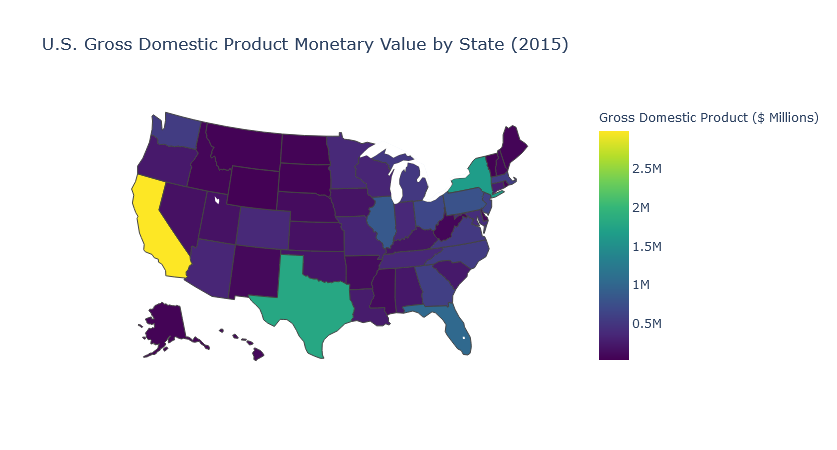

In [95]:
# Create the Choropleth plot
px.choropleth(
    df,
    locations='State',
    locationmode='USA-states',
    color='Gross Domestic Product ($ Millions)',
    color_continuous_scale=px.colors.sequential.Viridis,
    scope='usa',
    title='U.S. Gross Domestic Product Monetary Value by State (2015)'
)

# ================================

### 2.EXTRA.02 Storytelling with a Choropleth Plot

# Storytelling with a Chloropleth Plot

The focus of this activity is creating a choropleth plot to visualize the data from the 2011 Annual State Agricultural Exports dataset.

## Instructions

1. Open the [starter file](Stu-Storytelling_with_a_Choropleth_Plot/Unsolved/mapping_agriculture_export.ipynb), and prep your Mapbox API Credentials.

2. Create a Pandas DataFrame from the "2011_us_ag_exports.csv" file that is located in the Resources folder.

3. Plot the data as a chloropleth using `total exports` for the column values.

4. Plot the data as a chloropleth using `corn` for the column values.


### Hint

For more detailed information on building chloropleth plots with Plotly and the Mapbox API, check out the documentation [here](https://plotly.com/python/mapbox-county-choropleth/).

# Storytelling with a Choropleth Plot

The focus of this activity is creating a choropleth plot to visualize the data from the `2011 Annual State Agricultural Exports` dataset.

In [96]:
# Import Required Libraries
import pandas as pd
import os
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

### Prep Mapbox API Credentials

In [97]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_ACCESS_TOKEN")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

### Read in Data

In [98]:
# Read in data
df = pd.read_csv("Stu-Storytelling_with_a_Choropleth_Plot/Resources/2011_us_ag_exports.csv").dropna()

df.head()

code       state category  total exports   beef  pork  poultry   dairy  \
0   AL     Alabama    state        1390.63   34.4  10.6    481.0    4.06   
1   AK      Alaska    state          13.31    0.2   0.1      0.0    0.19   
2   AZ     Arizona    state        1463.17   71.3  17.9      0.0  105.48   
3   AR    Arkansas    state        3586.02   53.2  29.4    562.9    3.53   
4   CA  California    state       16472.88  228.7  11.1    225.4  929.95   

   fruits fresh  fruits proc  total fruits  veggies fresh  veggies proc  \
0           8.0         17.1         25.11            5.5           8.9   
1           0.0          0.0          0.00            0.6           1.0   
2          19.3         41.0         60.27          147.5         239.4   
3           2.2          4.7          6.88            4.4           7.1   
4        2791.8       5944.6       8736.40          803.2        1303.5   

   total veggies  corn  wheat   cotton  
0          14.33  34.9   70.0   317.61  
1           1.56   0.0    0.0     0.00  
2         386.91   7.3   48.7   423.95  
3          11.45  69.5  114.5   665.44  
4        2106.79  34.6  249.3  1064.95

## Plot Data
#### Map 1: Plot 2011 US Agriculture Exports by State

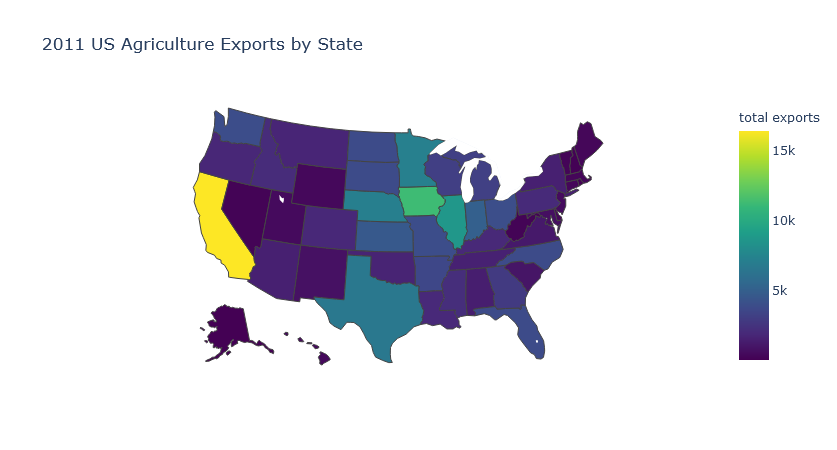

In [99]:
# Plot Choropleth using total exports column
px.choropleth(
    df['total exports'].astype(float),
    color='total exports',
    locations = df['code'],
    locationmode = 'USA-states',
    color_continuous_scale=px.colors.sequential.Viridis,
    scope='usa',
    title='2011 US Agriculture Exports by State'
)

#### Map 2: Plot 2011 US Agriculture Corn Exports by State

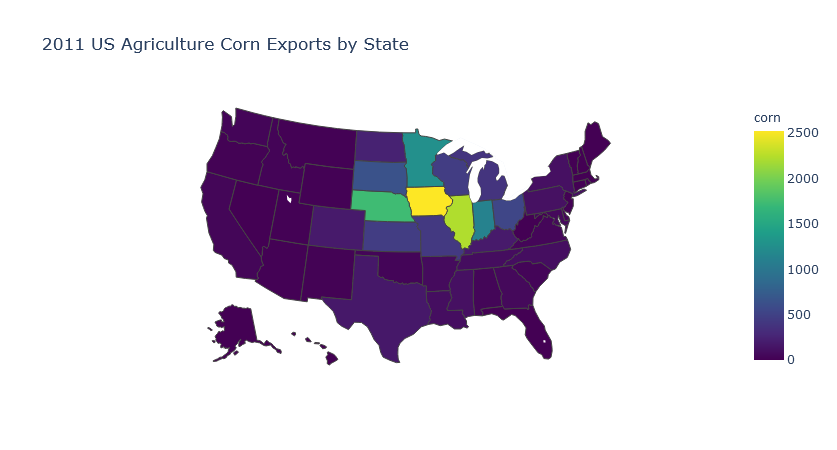

In [100]:
# Plot Choropleth using corn column
px.choropleth(
    df['corn'].astype(float),
    color='corn',
    locations = df['code'],
    locationmode = 'USA-states',
color_continuous_scale=px.colors.sequential.Viridis,
    scope='usa',
    title='2011 US Agriculture Corn Exports by State'
)

# ================================

### Rating Class Objectives

* rate your understanding using 1-5 method in each objective

In [ ]:
title = "06-Data-Visualization-with-PyViz - Day 2 - Plotly Express, Mapbox API"
objectives = [
    "Compose visualizations using Plotly Express and the Mapbox API",
    "Construct map plot visualizations",
    "Interact with the geospatial visualizations created with Plotly Express and the Mapbox API",
    "Create visualizations that consits of multiple plots",
    "Style plots with titles, labels, yformatter, hover colors etc",
]
rating = []
total = 0
for i in range(len(objectives)):
    rate = input(objectives[i]+"? ")
    total += int(rate)
    rating.append(objectives[i] + ". (" + rate + "/5)")
print("="*96)
print(f"Self Evaluation for: {title}")
print("-"*24)
for i in rating:
    print(i)
print("-"*64)
print("Average: " + str(total/len(objectives)))